In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'BankingData_FinalDataset.csv", sep = ',', header = 0)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,previous,emp.var.rate,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.108,1,0.087,0,0,0,0,0,261,1,0,0,1,93.994,-36.4,4.857,5191.0,0
1,57,0.074,1,0.110,1,0,0,0,0,149,1,0,0,1,93.994,-36.4,4.857,5191.0,0
2,37,0.074,1,0.110,0,1,0,0,0,226,1,0,0,1,93.994,-36.4,4.857,5191.0,0
3,40,0.157,1,0.087,0,0,0,0,0,151,1,0,0,1,93.994,-36.4,4.857,5191.0,0
4,56,0.074,1,0.110,0,0,1,0,0,307,1,0,0,1,93.994,-36.4,4.857,5191.0,0


In [2]:
df.shape

(41188, 19)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  float64
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  float64
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   day_of_week     41188 non-null  int64  
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  emp.var.rate    41188 non-null  int64  
 13  poutcome        41188 non-null  int64  
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [4]:
df_test = pd.read_csv("/Users/lynes/Desktop/BankingData_TestData_FinalDataset.csv", sep = ',', header = 0)
df_test.head(5)

,age,job,marital,education,default,housing,loan,contact,day_of_week,duration,campaign,previous,emp.var.rate,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0.074,1,0.087,0,1,0,1,0,487,2,0,1,1,92.893,-46.2,1.313,5099.1,0
1,39,0.074,0,0.110,0,0,0,0,0,346,4,0,0,1,93.994,-36.4,4.855,5191.0,0
2,25,0.074,1,0.110,0,1,0,0,1,227,1,0,0,1,94.465,-41.8,4.962,5228.1,0
3,38,0.074,1,0.087,0,0,1,0,0,17,3,0,0,1,94.465,-41.8,4.959,5228.1,0
4,47,0.157,1,0.138,0,1,0,1,0,58,1,0,0,1,93.200,-42.0,4.191,5195.8,0


In [5]:
df_test.shape

(4119, 19)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   float64
 2   marital         4119 non-null   int64  
 3   education       4119 non-null   float64
 4   default         4119 non-null   int64  
 5   housing         4119 non-null   int64  
 6   loan            4119 non-null   int64  
 7   contact         4119 non-null   int64  
 8   day_of_week     4119 non-null   int64  
 9   duration        4119 non-null   int64  
 10  campaign        4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  emp.var.rate    4119 non-null   int64  
 13  poutcome        4119 non-null   int64  
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

# Feature Selection Using Filter Methods

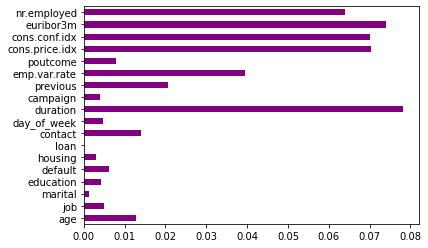

In [8]:
# retreive information gain for each variable by calculating reduction in entropy

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# identify features
X_importance = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 
                   'campaign', 'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'cons.conf.idx','euribor3m',
                   'nr.employed']]
# identify target
Y_importance = df['y']

importance = mutual_info_classif(X_importance, Y_importance)
feat_importance = pd.Series(importance, df.columns[0:len(df.columns)-1])
feat_importance.plot(kind = 'barh', color = 'purple')

plt.show()

In [9]:
# use SlectKBest to select 8 most relevant
# remove cons.conf.idx because it contains negative values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# identify features
X_SelectBest = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
                   'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]
# identify target
Y_SelectBest = df['y']

# extract features
selector = SelectKBest(chi2, k = 10)
selector.fit(X_SelectBest, Y_SelectBest)

# create new df
X_SelectBest_new = selector.transform(X_SelectBest)
X_SelectBest.columns[selector.get_support(indices=True)]

# print list of most relevant features
feature_names = list(X_SelectBest.columns[selector.get_support(indices=True)])
print(feature_names)

['age', 'default', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']


# Feature Selection Using Wrapper Methods

In [10]:
# Sequential Feature Selection
# remove or add one feature at the time based on the classifier performance 
# repeat until a feature subset of the desired size k is reached
# floating variants, SFFS and SBFS, use floating algorithms that have an additional exclusion or inclusion step
# removes features once they were included (or excluded); larger number of feature subset combinations can be sampled
# select 8 best features

# mlxtend documentation and installation: http://rasbt.github.io/mlxtend/

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# identify features
X_sfs = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
                   'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]
# identify target
Y_sfs = df['y']

# choose number of neighbors; even number of features, choose odd number
knn = KNeighborsClassifier(n_neighbors=3)

# use cv=4, implements 4-fold cross-validation for more robust estimate
# n_jobs=-1, run the cross-validation on all available CPU cores (note: computationally expensive)

# Sequential Forward Selection
sfs = SFS(knn, 
          k_features = 10, 
          forward = True, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sfs = sfs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Selection (k = 10):')
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features = 10, 
          forward = False, 
          floating = False, 
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sbs = sbs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Selection (k = 10):')
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features = 10, 
           forward = True, 
           floating = True, 
           scoring = 'accuracy',
           cv = 4,
           n_jobs = -1)
sffs = sffs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Floating Selection (k = 10):')
print(sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features = 10, 
           forward = False, 
           floating = True, 
           scoring = 'accuracy',
           cv = 4,
           n_jobs = -1)
sbfs = sbfs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Floating Selection (k = 10):')
print(sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k = 10):
('age', 'education', 'loan', 'contact', 'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate', 'poutcome')
CV Score:
0.8711275128678256

Sequential Backward Selection (k = 10):
('job', 'education', 'default', 'housing', 'loan', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome')
CV Score:
0.8757162280275809

Sequential Forward Floating Selection (k = 10):
('job', 'education', 'default', 'housing', 'loan', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome')
CV Score:
0.8757162280275809

Sequential Backward Floating Selection (k = 10):
('job', 'education', 'default', 'housing', 'loan', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome')
CV Score:
0.8757162280275809


In [11]:
# Sequential Feature Selection
# remove or add one feature at the time based on the classifier performance 
# repeat until a feature subset of the desired size k is reached
# floating variants, SFFS and SBFS, use floating algorithms that have an additional exclusion or inclusion step
# removes features once they were included (or excluded); larger number of feature subset combinations can be sampled
# select 8 best features

# mlxtend documentation and installation: http://rasbt.github.io/mlxtend/

from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# identify features
X_sfs = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
                   'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]
# identify target
Y_sfs = df['y']

# define logistic regression function
# increased max iterations for convergence
logreg = LogisticRegression(max_iter = 10000)

# use cv=4, implements 4-fold cross-validation for more robust estimate
# n_jobs=-1, run the cross-validation on all available CPU cores (note: computationally expensive)

# Sequential Forward Selection
sfs = SFS(estimator = logreg, 
          k_features = 10, 
          forward = True, 
          floating = False, 
          scoring = 'accuracy',
          cv = 5,
          n_jobs = -1)
sfs = sfs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Selection (k = 10):')
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(estimator = logreg, 
          k_features = 10, 
          forward = False, 
          floating = False, 
          scoring = 'accuracy',
          cv = 5,
          n_jobs = -1)
sbs = sbs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Selection (k = 10):')
print(sbs.k_feature_names_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(estimator = logreg, 
           k_features = 10, 
           forward = True, 
           floating = True, 
           scoring = 'accuracy',
           cv = 5,
           n_jobs = -1)
sffs = sffs.fit(X_sfs, Y_sfs)

print('\nSequential Forward Floating Selection (k = 10):')
print(sffs.k_feature_names_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(estimator = logreg, 
           k_features = 10, 
           forward = False, 
           floating = True, 
           scoring = 'accuracy',
           cv = 5,
           n_jobs = -1)
sbfs = sbfs.fit(X_sfs, Y_sfs)

print('\nSequential Backward Floating Selection (k = 10):')
print(sbfs.k_feature_names_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k = 10):
('age', 'job', 'default', 'housing', 'loan', 'day_of_week', 'duration', 'campaign', 'poutcome', 'nr.employed')
CV Score:
0.892492325632454

Sequential Backward Selection (k = 10):
('age', 'job', 'education', 'default', 'housing', 'loan', 'duration', 'campaign', 'poutcome', 'nr.employed')
CV Score:
0.8919824960962417

Sequential Forward Floating Selection (k = 10):
('age', 'job', 'default', 'housing', 'loan', 'day_of_week', 'duration', 'campaign', 'poutcome', 'nr.employed')
CV Score:
0.892492325632454

Sequential Backward Floating Selection (k = 10):
('age', 'job', 'education', 'default', 'housing', 'loan', 'duration', 'campaign', 'poutcome', 'nr.employed')
CV Score:
0.8919824960962417


In [12]:
# Recursive Feature Elimination using Logistic Regression (Lasso)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# suppress future warnings
import warnings
warnings.simplefilter(action='ignore')

# identify features
X_rfel = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
                   'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]
# identify target
Y_rfel = df['y']

# identify classifier
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')

# Select best features 
rfel = RFE(classifier, n_features_to_select = 10)
rfel = rfel.fit(X_rfel, Y_rfel)

#Summarize the selection of the attributes
print(rfel.support_)
print(rfel.ranking_)
X_rfel.columns[rfel.support_]

[False  True  True  True False False  True  True False  True  True  True
  True False  True False]
[5 1 1 1 2 3 1 1 6 1 1 1 1 4 1 7]


Index(['job', 'education', 'default', 'contact', 'day_of_week', 'campaign',
       'previous', 'emp.var.rate', 'poutcome', 'euribor3m'],
      dtype='object')

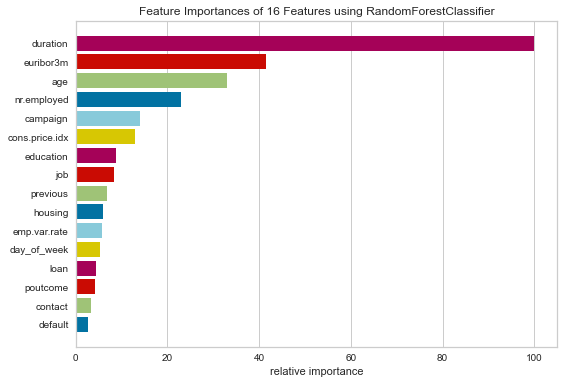

In [13]:
# Recursive Feature Elimination using Random Forest
# Yellowbrick documentation https://www.scikit-yb.org/en/latest/quickstart.html

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# suppress future warnings
import warnings
warnings.simplefilter(action='ignore')

# identify features
X_rferf = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
                   'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]
# identify target
Y_rferf = df['y']

model = RandomForestClassifier(max_features = 'sqrt', n_estimators = 500)
viz = FeatureImportances(model)
viz.fit(X_rferf, Y_rferf)
viz.show()

# Models Before Feature Selection

Training Data Accuracy:
0.8495994173343044
[[6745  553]
 [ 686  254]]


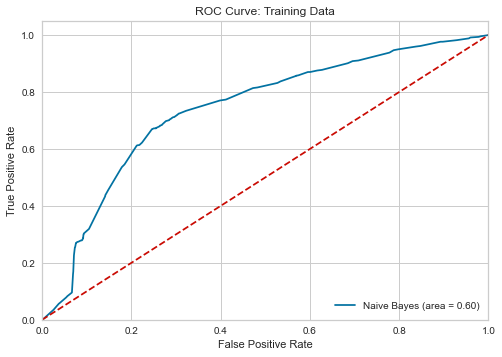

Test Data Accuracy:
0.8538480213644088
[[3377  291]
 [ 311  140]]


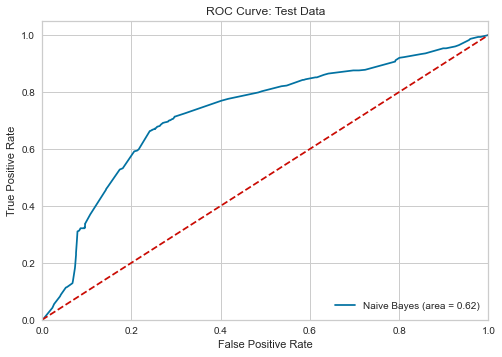

In [15]:
#Naive Bayes

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# identify training features
X_bnb = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify training target
y_bnb = df['y']

# identify test features
X_bnb_test = df_test[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify test target
y_bnb_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_bnb, y_bnb, test_size=.2, random_state=123)

# fit model
bnb_model = BernoulliNB().fit(X_train, y_train)

# training data prediction
predicted = bnb_model.predict(X_test)

# print training data accuracy
print('Training Data Accuracy:')
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))

# Naive Bayes training data ROC Curve
bnb_roc_auc = roc_auc_score(y_test, bnb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bnb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Naive Bayes (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('NB_ROC')
plt.show()

# test data prediction
test_predicted = bnb_model.predict(X_bnb_test)

# print test data accuracy
print('Test Data Accuracy:')
print(np.mean(test_predicted == y_bnb_test))
print(confusion_matrix(y_bnb_test, test_predicted))

# Naive Bayes test data ROC Curve
bnb_roc_auc = roc_auc_score(y_bnb_test, bnb_model.predict(X_bnb_test))
fpr, tpr, thresholds = roc_curve(y_bnb_test, bnb_model.predict_proba(X_bnb_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Naive Bayes (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Test Data')
plt.legend(loc = 'lower right')
plt.savefig('NB_ROC')
plt.show()

Training Data Accuracy: 0.9077445982034474


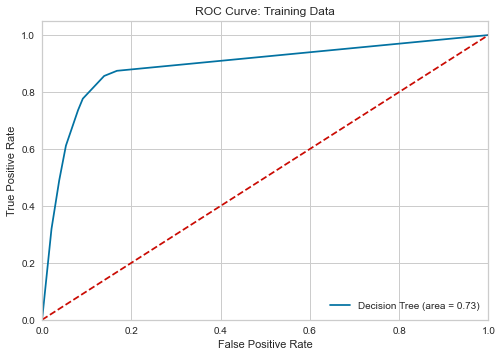

Test Data Accuracy: 0.9147851420247632


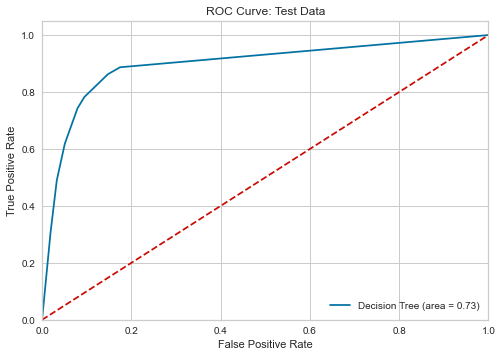

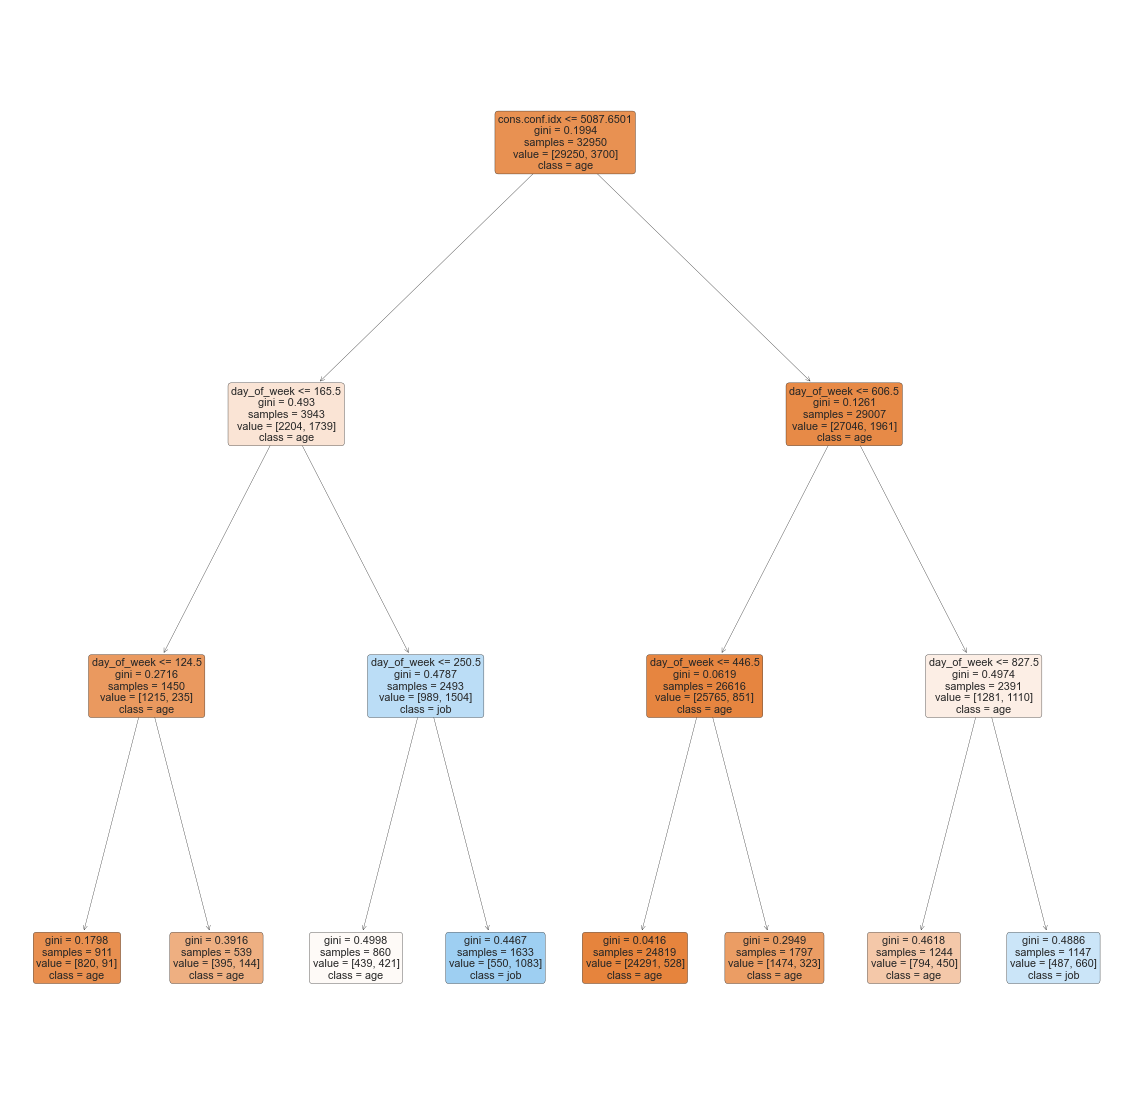

In [16]:
# Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.tree import export_graphviz
#from six import StringIO  
#from IPython.display import Image  
#import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

# identify features
dtree_X = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify target
dtree_y = df['y']

# identify test features
dtree_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 
                        'campaign','previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify test target
dtree_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(dtree_X, dtree_y, test_size = .2, random_state = 123)

# specify model
dtree = DecisionTreeClassifier(max_depth = 3)

# fit model
dtree.fit(X_train, y_train)


# training data prediction
y_pred = dtree.predict(X_test)
print('Training Data Accuracy:',metrics.accuracy_score(y_test, y_pred))

# decision tree training data ROC Curve
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('DT_ROC')
plt.show()

# test data prediction
test_y_pred = dtree.predict(dtree_X_test)
print('Test Data Accuracy:',metrics.accuracy_score(dtree_y_test, test_y_pred))

# decision tree test data ROC Curve
dt_roc_auc = roc_auc_score(dtree_y_test, dtree.predict(dtree_X_test))
fpr, tpr, thresholds = roc_curve(dtree_y_test, dtree.predict_proba(dtree_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Test Data')
plt.legend(loc = 'lower right')
plt.savefig('DT_ROC')
plt.show()

# plot decison tree
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree = dtree, feature_names = df.columns, 
                     class_names = ['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 
                                   'duration', 'campaign', 'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 
                                   'euribor3m', 'nr.employed'] , filled = True , precision = 4, rounded = True)

Accuracy of Random Forest Classifier on Training Data: 0.91
[[6982  316]
 [ 411  529]]


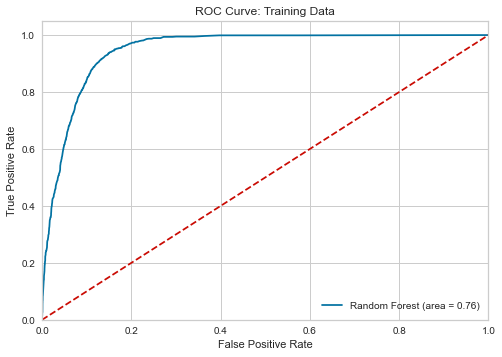

Accuracy of Random Forest Classifier on Test Data 0.98
[[3638   30]
 [  40  411]]


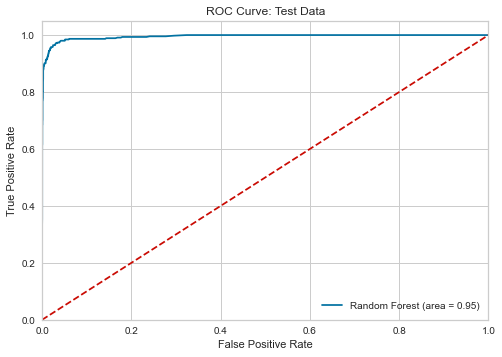

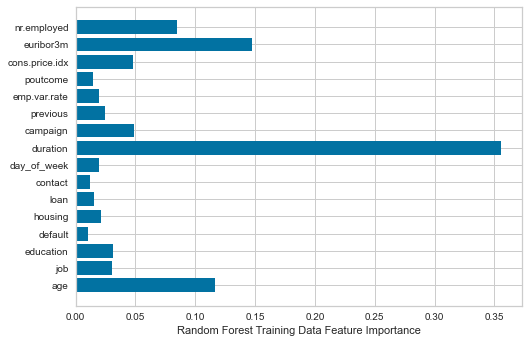

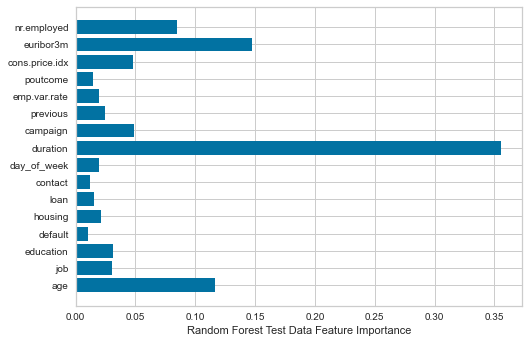

In [17]:
# Random Forest

from numpy import loadtxt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# added this to remove FutureWarning about deprecation of series.base
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# identify features
rf_X = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify target
rf_y = df['y']

# identify test features
rf_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify test target
rf_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, test_size=.2, random_state=123)

# specify model
rf_model = RandomForestClassifier(n_estimators = 500, bootstrap = True, max_features = 'sqrt') 

# fit the model
rf_model.fit(X_train, y_train)

# training data prediction
y_pred = rf_model.predict(X_test)
print('Accuracy of Random Forest Classifier on Training Data: {:.2f}'.format(rf_model.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('RF_ROC')
plt.show()

# test data prediction
test_y_pred = rf_model.predict(rf_X_test)
print('Accuracy of Random Forest Classifier on Test Data {:.2f}'.format(rf_model.score(rf_X_test, rf_y_test)))
print(confusion_matrix(rf_y_test, test_y_pred))

# test data ROC Curve
test_rf_roc_auc = roc_auc_score(rf_y_test, rf_model.predict(rf_X_test))
fpr, tpr, thresholds = roc_curve(rf_y_test, rf_model.predict_proba(rf_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % test_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Test Data')
plt.legend(loc = 'lower right')
plt.savefig('RF_ROC')
plt.show()

# plot training data feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.xlabel("Random Forest Training Data Feature Importance")
plt.show()

# plot  test data feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(rf_X_test.columns, rf_model.feature_importances_)
plt.xlabel("Random Forest Test Data Feature Importance")
plt.show()

Accuracy of XGBoost Classifier on Training Data: 0.91
[[7047  251]
 [ 451  489]]


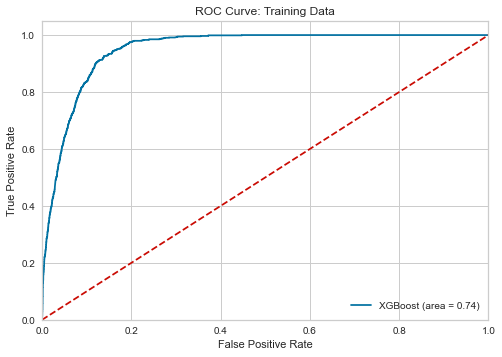

Accuracy of XGBoost Classifier on Test Data: 0.92
[[3555  113]
 [ 213  238]]


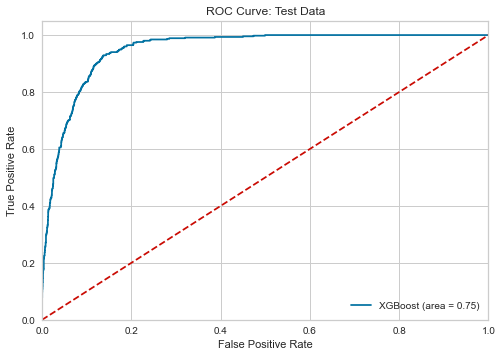

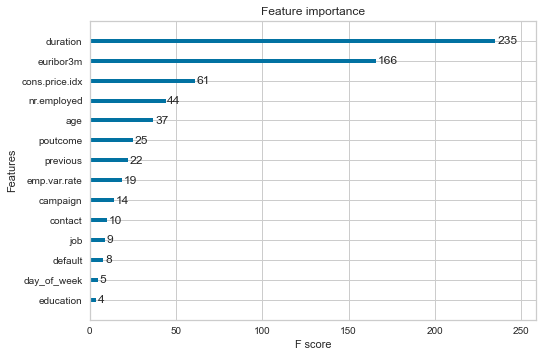

In [18]:
# XG Boost

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# added this to remove FutureWarning about deprecation of series.base
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

# identify features
xgb_X = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify target
xgb_y = df['y']

# identify test features
xgb_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify test target
xgb_y_test = df_test['y']

# specify model
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic') 

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(xgb_X, xgb_y, test_size=.2, random_state=123)

# fit the model
xgb_model.fit(X_train, y_train)

# training data prediction
y_pred = xgb_model.predict(X_test)
print('Accuracy of XGBoost Classifier on Training Data: {:.2f}'.format(xgb_model.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('XGB_ROC')
plt.show()

# test data prediction
test_y_pred = xgb_model.predict(xgb_X_test)
print('Accuracy of XGBoost Classifier on Test Data: {:.2f}'.format(xgb_model.score(xgb_X_test, xgb_y_test)))
print(confusion_matrix(xgb_y_test, test_y_pred))

# test data ROC Curve
test_xgb_roc_auc = roc_auc_score(xgb_y_test, xgb_model.predict(xgb_X_test))
fpr, tpr, thresholds = roc_curve(xgb_y_test, xgb_model.predict_proba(xgb_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='XGBoost (area = %0.2f)' % test_xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Test Data')
plt.legend(loc = 'lower right')
plt.savefig('XGB_ROC')
plt.show()

# plot feature importance
plot_importance(xgb_model)
pyplot.show()

Optimization terminated successfully.
         Current function value: 0.220936
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.372     
Dependent Variable: y                AIC:              18231.8038
Date:               2020-12-07 11:36 BIC:              18369.8182
No. Observations:   41188            Log-Likelihood:   -9099.9   
Df Model:           15               LL-Null:          -14499.   
Df Residuals:       41172            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               0.0068   0.0016   4.1174 0.0000  0.0036  0.0100
job               5.3941   0.6146   8.7771 0.0000  4.1896  6.5986


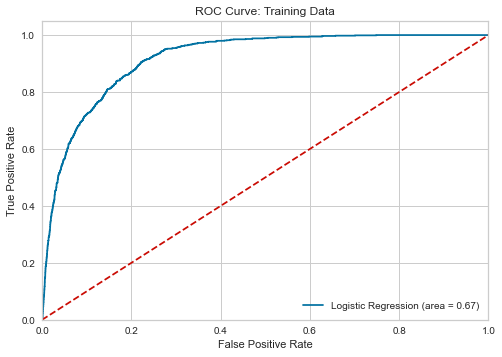

Accuracy of Logistic Regression on Training Data 0.91
[[3592   76]
 [ 299  152]]


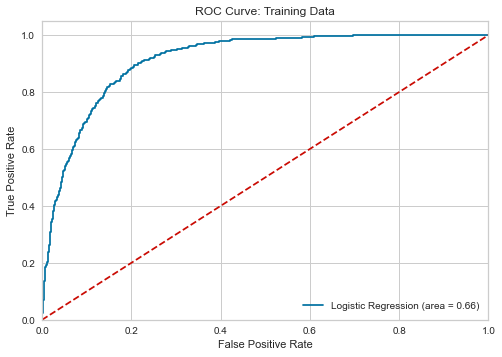

In [19]:
# logistic regression

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas.util.testing as tm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# identify features
log_X = df[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify target
log_y =  df['y']

# identify test features
log_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'duration', 'campaign',
        'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 'euribor3m', 'nr.employed']]

# identify test target
log_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(log_X, log_y, test_size=0.2,random_state=123)

# specify model
logit_model = sm.Logit(log_y,log_X)

# fit model
model = logit_model.fit()

# print output
print(model.summary2())

# select all predictors from previous regression model with p-values less than␣0.1
# use those predictors to run a new model
predictors = model.pvalues[model.pvalues <= 0.1].index.tolist()

# identify subset of new predictors (X = subset of the data)
sub_X = log_X[predictors]

# re-fit model
model = sm.Logit(log_y,sub_X).fit()

# predict using subset X
predictions = model.predict(sub_X)

# print output
print(model.summary2())

# training data prediction 
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression on Training Data {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

# test data prediction 
logreg = LogisticRegression(solver='liblinear')
logreg.fit(log_X_test, log_y_test)
test_y_pred = logreg.predict(log_X_test)
print('Accuracy of Logistic Regression on Training Data {:.2f}'.format(logreg.score(log_X_test, log_y_test)))
print(confusion_matrix(log_y_test, test_y_pred))

# test data ROC Curve
test_logit_roc_auc = roc_auc_score(log_y_test, logreg.predict(log_X_test))
fpr, tpr, thresholds = roc_curve(log_y_test, logreg.predict_proba(log_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % test_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Training Data')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

# Models After Feature Selection

Training Data Accuracy:
0.8858946346200534
[[7298    0]
 [ 940    0]]


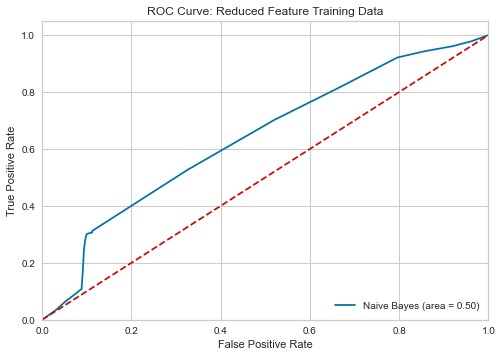

Test Data Accuracy:
0.890507404709881
[[3668    0]
 [ 451    0]]


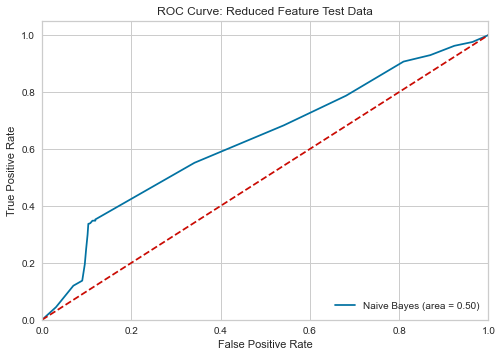

In [20]:
#Naive Bayes

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# identify training features
X_bnb = df[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
            'poutcome', 'nr.employed']]

# identify training target
y_bnb = df['y']

# identify test features
X_bnb_test = df_test[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
                    'poutcome', 'nr.employed']]

# identify test target
y_bnb_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_bnb, y_bnb, test_size=.2, random_state=123)

# fit model
bnb_model = BernoulliNB().fit(X_train, y_train)

# training data prediction
predicted = bnb_model.predict(X_test)

# print training data accuracy
print('Training Data Accuracy:')
print(np.mean(predicted == y_test))
print(confusion_matrix(y_test, predicted))

# Naive Bayes training data ROC Curve
bnb_roc_auc = roc_auc_score(y_test, bnb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bnb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Naive Bayes (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Training Data')
plt.legend(loc = 'lower right')
plt.savefig('NB_ROC')
plt.show()

# test data prediction
test_predicted = bnb_model.predict(X_bnb_test)

# print test data accuracy
print('Test Data Accuracy:')
print(np.mean(test_predicted == y_bnb_test))
print(confusion_matrix(y_bnb_test, test_predicted))

# Naive Bayes test data ROC Curve
bnb_roc_auc = roc_auc_score(y_bnb_test, bnb_model.predict(X_bnb_test))
fpr, tpr, thresholds = roc_curve(y_bnb_test, bnb_model.predict_proba(X_bnb_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Naive Bayes (area = %0.2f)' % bnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Test Data')
plt.legend(loc = 'lower right')
plt.savefig('NB_ROC')
plt.show()

Training Data Accuracy: 0.9077445982034474


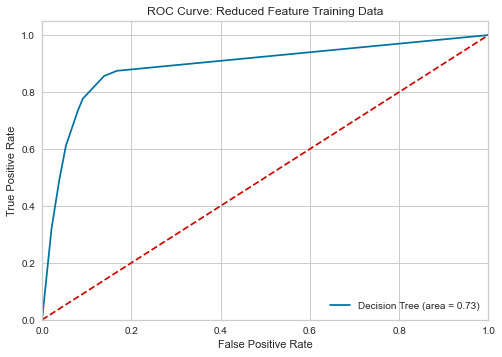

Test Data Accuracy: 0.9147851420247632


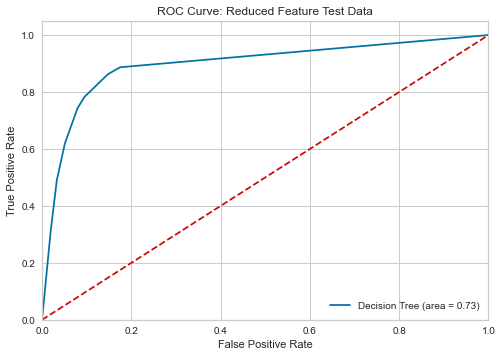

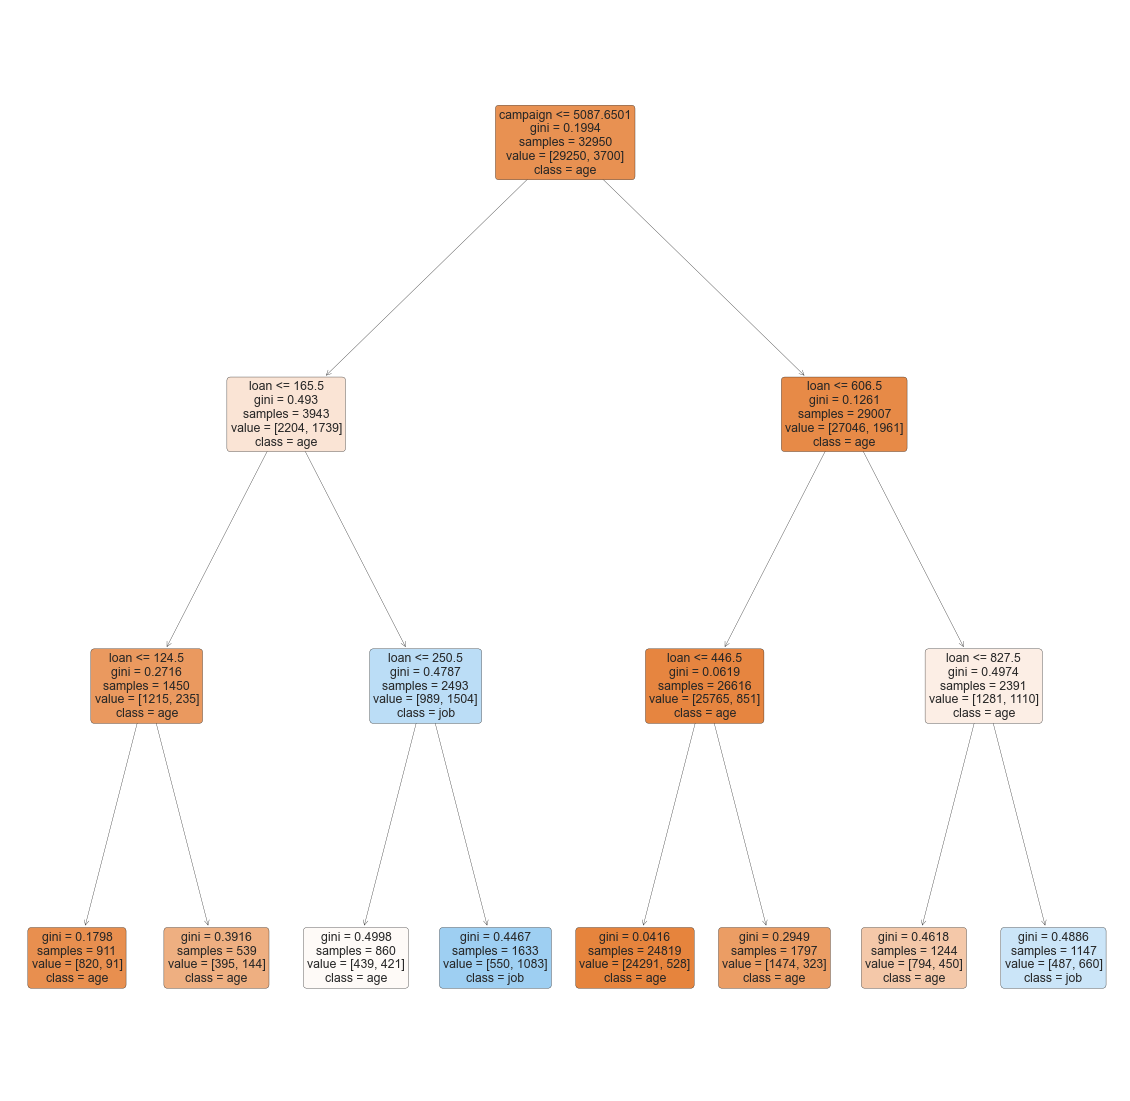

In [21]:
# Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.tree import export_graphviz
#from six import StringIO  
#from IPython.display import Image  
#import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc

# identify features
dtree_X = df[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
            'poutcome', 'nr.employed']]

# identify target
dtree_y = df['y']

# identify test features
dtree_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
                        'poutcome', 'nr.employed']]

# identify test target
dtree_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(dtree_X, dtree_y, test_size = .2, random_state = 123)

# specify model
dtree = DecisionTreeClassifier(max_depth = 3)

# fit model
dtree.fit(X_train, y_train)


# training data prediction
y_pred = dtree.predict(X_test)
print('Training Data Accuracy:',metrics.accuracy_score(y_test, y_pred))

# decision tree training data ROC Curve
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Training Data')
plt.legend(loc = 'lower right')
plt.savefig('DT_ROC')
plt.show()

# test data prediction
test_y_pred = dtree.predict(dtree_X_test)
print('Test Data Accuracy:',metrics.accuracy_score(dtree_y_test, test_y_pred))

# decision tree test data ROC Curve
dt_roc_auc = roc_auc_score(dtree_y_test, dtree.predict(dtree_X_test))
fpr, tpr, thresholds = roc_curve(dtree_y_test, dtree.predict_proba(dtree_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Test Data')
plt.legend(loc = 'lower right')
plt.savefig('DT_ROC')
plt.show()

# plot decison tree
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree = dtree, feature_names = df.columns, 
                     class_names = ['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 
                                   'duration', 'campaign', 'previous', 'emp.var.rate', 'poutcome', 'cons.price.idx', 
                                   'euribor3m', 'nr.employed'] , filled = True , precision = 4, rounded = True)

Accuracy of Random Forest Classifier on Training Data: 0.91
[[7022  276]
 [ 443  497]]


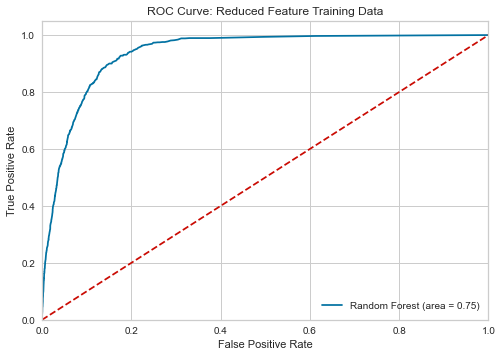

Accuracy of Random Forest Classifier on Test Data 0.98
[[3640   28]
 [  44  407]]


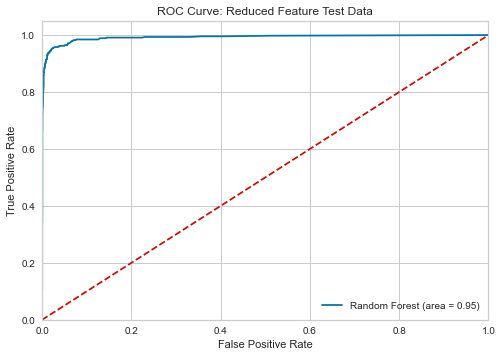

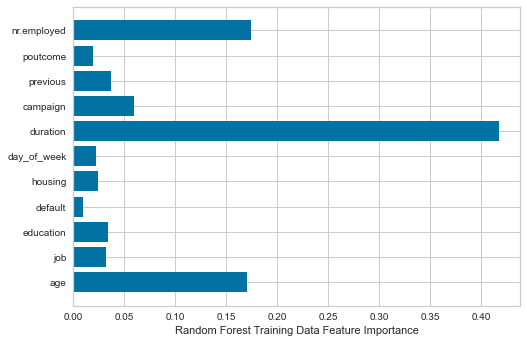

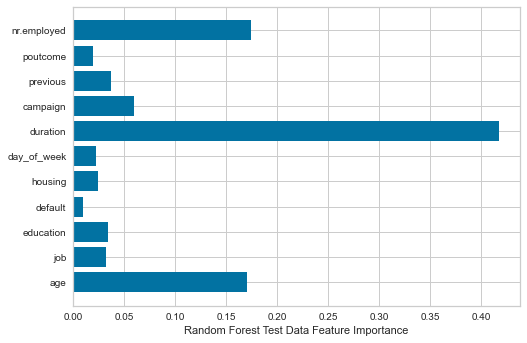

In [22]:
# Random Forest

from numpy import loadtxt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# added this to remove FutureWarning about deprecation of series.base
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# identify features
rf_X = df[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
            'poutcome', 'nr.employed']]

# identify target
rf_y = df['y']

# identify test features
rf_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
                    'poutcome', 'nr.employed']]

# identify test target
rf_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, test_size=.2, random_state=123)

# specify model
rf_model = RandomForestClassifier(n_estimators = 500, bootstrap = True, max_features = 'sqrt') 

# fit the model
rf_model.fit(X_train, y_train)

# training data prediction
y_pred = rf_model.predict(X_test)
print('Accuracy of Random Forest Classifier on Training Data: {:.2f}'.format(rf_model.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Training Data')
plt.legend(loc = 'lower right')
plt.savefig('RF_ROC')
plt.show()

# test data prediction
test_y_pred = rf_model.predict(rf_X_test)
print('Accuracy of Random Forest Classifier on Test Data {:.2f}'.format(rf_model.score(rf_X_test, rf_y_test)))
print(confusion_matrix(rf_y_test, test_y_pred))

# test data ROC Curve
test_rf_roc_auc = roc_auc_score(rf_y_test, rf_model.predict(rf_X_test))
fpr, tpr, thresholds = roc_curve(rf_y_test, rf_model.predict_proba(rf_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % test_rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Test Data')
plt.legend(loc = 'lower right')
plt.savefig('RF_ROC')
plt.show()

# plot training data feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.xlabel("Random Forest Training Data Feature Importance")
plt.show()

# plot  test data feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(rf_X_test.columns, rf_model.feature_importances_)
plt.xlabel("Random Forest Test Data Feature Importance")
plt.show()

Accuracy of XGBoost Classifier on Training Data: 0.91
[[7057  241]
 [ 466  474]]


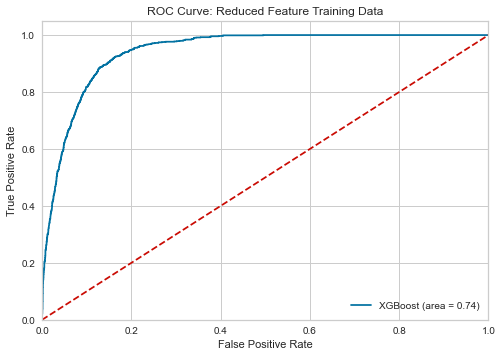

Accuracy of XGBoost Classifier on Test Data: 0.92
[[3555  113]
 [ 219  232]]


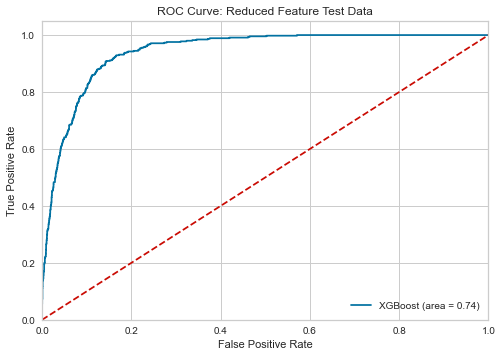

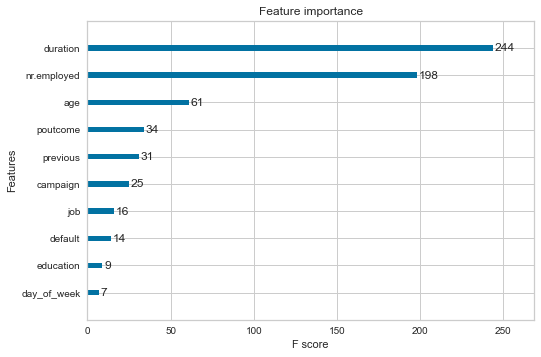

In [23]:
# XG Boost

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# added this to remove FutureWarning about deprecation of series.base
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

# identify features
xgb_X = df[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
            'poutcome', 'nr.employed']]

# identify target
xgb_y = df['y']

# identify test features
xgb_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
                    'poutcome', 'nr.employed']]

# identify test target
xgb_y_test = df_test['y']

# specify model
xgb_model = xgb.XGBClassifier(objective = 'reg:logistic') 

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(xgb_X, xgb_y, test_size=.2, random_state=123)

# fit the model
xgb_model.fit(X_train, y_train)

# training data prediction
y_pred = xgb_model.predict(X_test)
print('Accuracy of XGBoost Classifier on Training Data: {:.2f}'.format(xgb_model.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Training Data')
plt.legend(loc = 'lower right')
plt.savefig('XGB_ROC')
plt.show()

# test data prediction
test_y_pred = xgb_model.predict(xgb_X_test)
print('Accuracy of XGBoost Classifier on Test Data: {:.2f}'.format(xgb_model.score(xgb_X_test, xgb_y_test)))
print(confusion_matrix(xgb_y_test, test_y_pred))

# test data ROC Curve
test_xgb_roc_auc = roc_auc_score(xgb_y_test, xgb_model.predict(xgb_X_test))
fpr, tpr, thresholds = roc_curve(xgb_y_test, xgb_model.predict_proba(xgb_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label ='XGBoost (area = %0.2f)' % test_xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Test Data')
plt.legend(loc = 'lower right')
plt.savefig('XGB_ROC')
plt.show()

# plot feature importance
plot_importance(xgb_model)
pyplot.show()

Optimization terminated successfully.
         Current function value: 0.249593
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.291     
Dependent Variable: y                AIC:              20582.5106
Date:               2020-12-07 11:46 BIC:              20677.3955
No. Observations:   41188            Log-Likelihood:   -10280.   
Df Model:           10               LL-Null:          -14499.   
Df Residuals:       41177            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           0.0154    0.0016    9.4269  0.0000   0.0122   0.0186
job           8.5290    0.5859   14.5573  0.0000   7.3807   9.

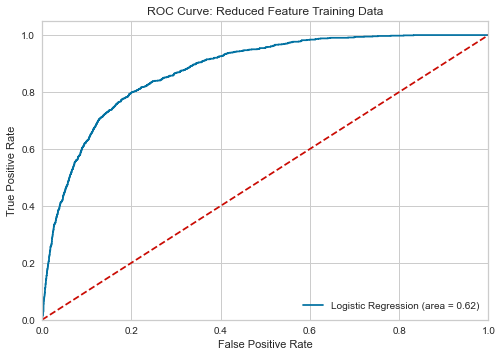

Accuracy of Logistic Regression on Test Data 0.90
[[3605   63]
 [ 330  121]]


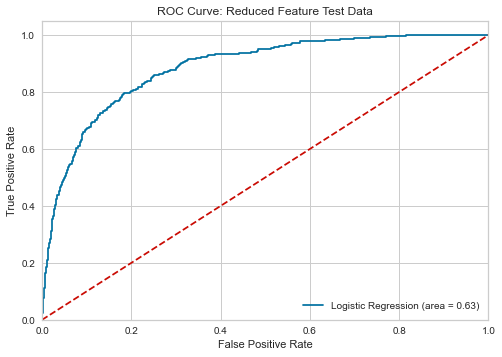

In [24]:
# logistic regression

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas.util.testing as tm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# identify features
log_X = df[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
            'poutcome', 'nr.employed']]

# identify target
log_y =  df['y']

# identify test features
log_X_test = df_test[['age', 'job', 'education', 'default', 'housing', 'day_of_week', 'duration', 'campaign', 'previous', 
                    'poutcome', 'nr.employed']]

# identify test target
log_y_test = df_test['y']

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(log_X, log_y, test_size=0.2,random_state=123)

# specify model
logit_model = sm.Logit(log_y,log_X)

# fit model
model = logit_model.fit()

# print output
print(model.summary2())

# select all predictors from previous regression model with p-values less than␣0.1
# use those predictors to run a new model
predictors = model.pvalues[model.pvalues <= 0.1].index.tolist()

# identify subset of new predictors (X = subset of the data)
sub_X = log_X[predictors]

# re-fit model
model = sm.Logit(log_y,sub_X).fit()

# predict using subset X
predictions = model.predict(sub_X)

# print output
print(model.summary2())

# training data prediction 
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression on Training Data {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))

# training data ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Training Data')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

# test data prediction 
logreg = LogisticRegression(solver='liblinear')
logreg.fit(log_X_test, log_y_test)
test_y_pred = logreg.predict(log_X_test)
print('Accuracy of Logistic Regression on Test Data {:.2f}'.format(logreg.score(log_X_test, log_y_test)))
print(confusion_matrix(log_y_test, test_y_pred))

# test data ROC Curve
test_logit_roc_auc = roc_auc_score(log_y_test, logreg.predict(log_X_test))
fpr, tpr, thresholds = roc_curve(log_y_test, logreg.predict_proba(log_X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % test_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Reduced Feature Test Data')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()